In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Replace 'data.csv' with the path to your dataset
df = pd.read_csv('../data/HuntersGreenHomeSales_prepped.csv')

# Check the first few rows
df.head()


,slnoskm,Status,Address,Street_only,lat,long,Beds,bathsfull,bathshalf,bathstotal,...,datesold,ds_dom,ds_moy,ds_year,splsale,splsal_Auction,splsal_shortsale,splsale_BankOwnedREO,pricesold,days_on_market
0,1,Sold,17711 ESPRIT DR,ESPRIT DR,28.127921,-82.340184,3,2,0,2,...,10/6/2018,6,10,2018,Short Sale,0,1,0,141500,451
1,2,Sold,17769 ESPRIT DR,ESPRIT DR,28.130015,-82.339863,2,2,0,2,...,7/30/2015,30,7,2015,NaN,0,0,0,160000,28
2,3,Sold,17622 ESPRIT DR,ESPRIT DR,28.129953,-82.341055,3,2,0,2,...,7/29/2015,29,7,2015,NaN,0,0,0,161500,42
3,4,Sold,18111 ASHTON PARK WAY,ASHTON PARK WAY,28.138067,-82.333513,3,2,0,2,...,7/29/2016,29,7,2016,NaN,0,0,0,170000,35
4,5,Sold,9203 CELEBRATION CT,CELEBRATION CT,28.129131,-82.340659,4,2,1,3,...,9/30/2016,30,9,2016,Short Sale,0,1,0,170000,417


In [5]:
df.isnull().sum()


slnoskm                     0
Status                      0
Address                     0
Street_only                 0
 lat                        0
long                        0
Beds                        0
bathsfull                   0
bathshalf                   0
bathstotal                  0
sqft                        0
garages                     4
roof_Built-Up               0
roof_Concrete               0
roof_Shake                  0
roof_Shingle                0
roof_Slate                  0
roof_Tile                   0
roof_Other                  0
lotsqft                     0
yrblt                       0
pool_Community              0
pool_Private                0
pool_None                   0
spa                       313
subdivn                     0
adom_agentdaysonmarket      0
cdom_cumuldaysmls           0
listprice                   0
lppersqft                   0
PendingDate                 0
pd_dom                      0
pd_moy                      0
pd_year   

In [6]:
df.describe()


,slnoskm,lat,long,Beds,bathsfull,bathshalf,bathstotal,sqft,garages,roof_Built-Up,...,pd_year,sppersqft,ds_dom,ds_moy,ds_year,splsal_Auction,splsal_shortsale,splsale_BankOwnedREO,pricesold,days_on_market
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,478.000000,482.000000,...,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000
mean,241.500000,28.131616,-82.342600,3.867220,2.657676,0.338174,2.995851,2637.840249,2.493724,0.002075,...,2016.929461,129.264544,17.506224,6.670124,2016.993776,0.006224,0.016598,0.043568,3.462366e+05,42.045643
std,139.285678,0.004650,0.008996,0.702686,0.686242,0.495043,0.828283,824.840471,0.552261,0.045549,...,1.373647,20.988511,9.231430,3.102728,1.362538,0.078729,0.127890,0.204345,1.519187e+05,32.755282
min,1.000000,28.120558,-82.361649,2.000000,2.000000,0.000000,2.000000,1305.000000,1.000000,0.000000,...,2015.000000,73.850000,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,1.415000e+05,0.000000
25%,121.250000,28.128643,-82.349495,3.000000,2.000000,0.000000,3.000000,2079.000000,2.000000,0.000000,...,2016.000000,114.962500,10.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,2.479250e+05,30.000000
50%,241.500000,28.130942,-82.340279,4.000000,3.000000,0.000000,3.000000,2529.000000,2.000000,0.000000,...,2017.000000,129.595000,17.500000,7.000000,2017.000000,0.000000,0.000000,0.000000,3.272500e+05,38.000000
75%,361.750000,28.134783,-82.335941,4.000000,3.000000,1.000000,3.000000,3005.750000,3.000000,0.000000,...,2018.000000,141.950000,26.000000,9.000000,2018.000000,0.000000,0.000000,0.000000,3.965000e+05,48.000000
max,482.000000,28.141323,-82.327339,6.000000,6.000000,2.000000,8.000000,8398.000000,5.000000,1.000000,...,2019.000000,218.160000,31.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,1.435000e+06,451.000000


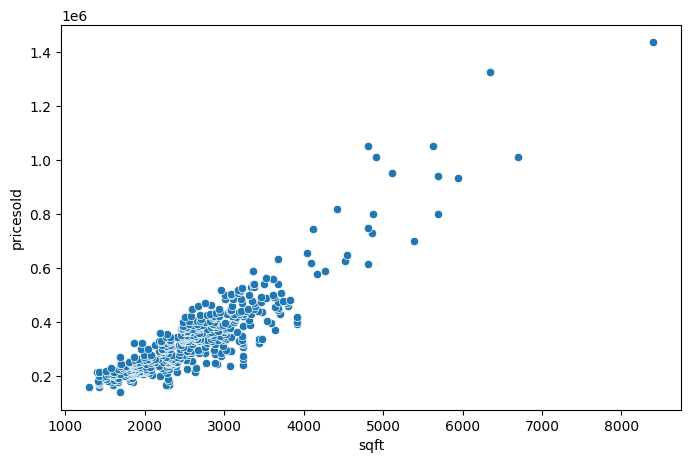

In [11]:
# Example: scatter plot of 'square_feet' vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sqft'], y=df['pricesold'])
plt.show()


In [13]:
# Simple approach: drop rows with any missing values (not always recommended)
df = df.dropna()

# Convert categorical columns to dummy variables (example: 'neighborhood')
df = pd.get_dummies(df, columns=['Street_only'], drop_first=True)


In [ ]:
# Simple transformation example
df['log_square_feet'] = np.log1p(df['square_feet'])

# If your dataset has many numerical features, you might scale them
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric_cols = ['square_feet', 'some_other_numeric_col', ...]
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [15]:
# Example: using some columns as features
feature_cols = [
    'log_square_feet',
    'Beds',
    'bathstotal',
    'garages',
    'yrblt',
    'Street_only'
]

X = df[feature_cols]
y = df['price_sold']


KeyError: "['log_square_feet', 'Street_only'] not in index"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R^2:", r2_lin)
